In [1]:
import pandas as pd

initiate_search = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/initiate_search.csv')
# an event that is triggered when a user enters an empty search
# query field to begin entering a query. This is the first event of what we define as a
# search session.

search_result = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/search_result.csv')
# an event that is triggered when query results are received after a
# user performs a query

click_search = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/click_search.csv')
# an event that is triggered when a user makes a click on the search
# page (e.g. clicking on a search result). We typically consider a click on content
# the successful completion of a search session.

search_query = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/search_query.csv')
# the backend response event that is used to populate the search
# engine results page. Contains lots of metadata pertaining to the SERP.

user_metadata = pd.read_csv('/Users/orin/Data Science/tidal_da_test/data/user_metadata.csv')
# a table containing information about users. You can assume that
# this information is captured at the end of the time period.

# First look at the data

**initiate_search**: an event that is triggered when a user enters an empty search
query field to begin entering a query. This is the first event of what we define as a
search session.

In [2]:
display(initiate_search.head())
print(initiate_search.info())
print((initiate_search.searchUuid.value_counts().head(10)))

,dt,client_platform,event_name,user_id,event_ts,server_ts,method,searchUuid
0,2021-02-06,iOS,initiate_search,225,1612648404589,1612648405,clickInBar,1612648404588.040518700386519682
1,2021-02-05,iOS,initiate_search,95,1612565307151,1612565307,deleteSearch,1612565307150.03093909192593003
2,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003
3,2021-02-05,iOS,initiate_search,95,1612565891804,1612565892,deleteSearch,1612565891803.03093909192593003
4,2021-02-05,iOS,initiate_search,95,1612564856980,1612564857,searchButton,1612564856977.03093909192593003


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14385 entries, 0 to 14384
Data columns (total 8 columns):
dt                 14385 non-null object
client_platform    14385 non-null object
event_name         14385 non-null object
user_id            14385 non-null int64
event_ts           14385 non-null int64
server_ts          14385 non-null int64
method             14385 non-null object
searchUuid         14385 non-null object
dtypes: int64(3), object(5)
memory usage: 899.2+ KB
None
1612556043999.0171297301277280809       3
1612556056230.0171297301277280809       3
dea48dc1-0338-4b85-9694-e2e9ceb4ba6f    2
aa15730c-142e-48f8-b6a6-006f87656df8    2
78a1e913-f27a-4443-92de-7368d62361bf    2
92eca60f-8e2b-47ef-b07a-e6858208cf19    2
4430c281-aa2b-4a04-a12d-1953c767e6ff    2
94b98718-5cb7-4e9f-8722-61cf805a9aa7    2
1612552691208.0177008286398674524       1
4717a4ca-e9dc-46fc-8241-5318fb02629e    1
Name: searchUuid, dtype: int64


In [3]:
for column in initiate_search.columns:
    print("---- %s ---" % column)
    print(initiate_search[column].value_counts(), '\n')

---- dt ---
2021-02-06    2551
2021-02-05    2346
2021-02-07    2081
2021-02-01    1912
2021-02-04    1877
2021-02-03    1857
2021-02-02    1761
Name: dt, dtype: int64 

---- client_platform ---
iOS        7238
android    5642
desktop    1505
Name: client_platform, dtype: int64 

---- event_name ---
initiate_search    14385
Name: event_name, dtype: int64 

---- user_id ---
176     225
1076    158
75      150
852     116
866     109
       ... 
835       1
1117      1
819       1
811       1
338       1
Name: user_id, Length: 1198, dtype: int64 

---- event_ts ---
1612145670539    3
1612556090301    3
1612145670540    3
1612556090306    3
1612527836733    2
                ..
1612418395471    1
1612635962709    1
1612377987662    1
1612399140177    1
1612517988539    1
Name: event_ts, Length: 14298, dtype: int64 

---- server_ts ---
1612490936    64
1612734578    64
1612455756    46
1612540456    42
1612523112    41
              ..
1612232866     1
1612447901     1
1612646556     1
161

**search_query**: search_query: the *backend response event* that is used to populate the search
engine results page. Contains lots of metadata pertaining to the SERP.

In [4]:
display(search_query.head())
print(search_query.info())

,dt,user_id,server_ts,query,queryUuid,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
0,2021-02-07,1094,1612718227,georg benda,8698c2dc-fd4e-4f2b-81e1-c79601cd5f7a,"[{""id"":""11363806"",""popularityWW"":""0""},{""id"":""1...","[{""id"":""12388224"",""popularityWW"":""0""},{""id"":""2...","[{""id"":""165946610"",""popularityCountry"":""2""},{""...",[],"{""track"":16,""video"":4,""artist"":18,""album"":10,""...","[{""id"":165946610,""contentType"":""Album""},{""id"":..."
1,2021-02-07,863,1612726941,in,98ffcc2e-f84e-4587-80fd-89e1b178225d,"[{""id"":""134858528"",""popularityCountry"":""97""},{...","[{""id"":""24053"",""popularityCountry"":""48""},{""id""...","[{""id"":""52885530"",""popularityCountry"":""90""},{""...","[{""id"":""37690657"",""popularityCountry"":""62""},{""...","{""track"":92,""video"":16,""artist"":74,""album"":39,...","[{""id"":134858528,""contentType"":""Track""},{""id"":..."
2,2021-02-07,850,1612715317,jid,83a827ae-a93e-4148-88a1-c9f2715b886a,"[{""id"":""108769424"",""popularityCountry"":""64""},{...","[{""id"":""7061089"",""popularityCountry"":""92""},{""i...","[{""id"":""100122410"",""popularityCountry"":""76""},{...","[{""id"":""120672680"",""popularityCountry"":""39""},{...","{""track"":9,""video"":6,""artist"":11,""album"":6,""pl...","[{""id"":7061089,""contentType"":""Artist""},{""id"":1..."
3,2021-02-07,49,1612725870,Benz window,2487a99a-efb9-41ee-8f8d-e4203ea22f4c,"[{""id"":""102847894"",""popularityWW"":""0""},{""id"":""...","[{""id"":""11408668"",""popularityWW"":""0""}]",[],[],"{""track"":35,""video"":4,""artist"":34,""album"":10,""...","[{""id"":46783326,""contentType"":""Playlist""},{""id..."
4,2021-02-07,231,1612726235,London homesick,a1ad34dd-0927-42cf-84f4-e9c6fafbfb86,"[{""id"":""35717236"",""popularityCountry"":""4""},{""i...",[],[],[],"{""track"":71,""video"":14,""artist"":32,""album"":33,...","[{""id"":7896962,""contentType"":""Playlist""},{""id""..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 11 columns):
dt               27800 non-null object
user_id          27800 non-null int64
server_ts        27800 non-null int64
query            27800 non-null object
queryUuid        27800 non-null object
trackResults     27800 non-null object
artistResults    27800 non-null object
albumResults     27800 non-null object
videoResults     27800 non-null object
responseTime     27800 non-null object
topResults       27800 non-null object
dtypes: int64(2), object(9)
memory usage: 2.3+ MB
None


**search_result**: an event that is triggered when query results are received after a
user performs a query

In [5]:
display(search_result.head())
print(search_result.info())
print(search_result.queryUuid.value_counts())

,dt,client_platform,event_name,user_id,event_ts,server_ts,query,searchUuid,queryUuid
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31449 entries, 0 to 31448
Data columns (total 9 columns):
dt                 31449 non-null object
client_platform    31449 non-null object
event_name         31449 non-null object
user_id            31449 non-null int64
event_ts           31449 non-null int64
server_ts          31449 non-null int64
query              31424 non-null object
searchUuid         31449 non-null object
queryUuid          31424 non-null object
dtypes: int64(3), object(6)
memory usage: 2.2+ MB
None
offline                                 42
543c49d9-fb71-429c-9ad7-cfc173b285a2     9
165e39a2-94d7-44bd-aa9e-fbe08073d6b3     8
392ce0c7-2dad-4b26-9976-cf9c16f019b4     8
ada61a29-cd51-4c87-936c-bdd58e529fb4     7
                                        ..
1edb7ee7-6b4f-4498-9963-5998df674a1e     1
a09aa4a8-2a36-4b70-aa95-03e0f44364b5     1
53d774ea-48da-41b7-a4d4-c8c821843cec     1
a6635b59-89c5-4883-bde9-77cfb55b3aa5     1
45ae3634-4621-4d61-aa64-69d5dd860c00     

A few null values in query and queryUUid: results with no query? Can join with initiate_search on searchUuid

Can join with search_query with search_result on queryUuid.

**click_search**: an event that is triggered when a user makes a click on the search
page (e.g. clicking on a search result). We typically consider a click on content
the *successful completion* of a search session.

In [6]:
display(click_search.head())
print(click_search.info())

,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-02,android,click_search,951,1612233213601,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,NaN,search,cancelSearch,NaN,NaN,NaN,NaN,xSearch
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 15 columns):
dt                  16717 non-null object
client_platform     16717 non-null object
event_name          16717 non-null object
user_id             16717 non-null int64
event_ts            16717 non-null int64
server_ts           16717 non-null int64
searchUuid          16717 non-null object
queryUuid           15681 non-null object
pageId              13476 non-null object
endResult           16717 non-null object
contentType         14845 non-null object
contentId           14441 non-null object
contentPlacement    14634 non-null float64
moduleId            14914 non-null object
buttonId            1753 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 1.9+ MB
None


In [7]:
display(user_metadata.head())
print(user_metadata.info())

,user_id,birthday,gender,countryCode,free,churned,subscriptionType
0,730,1993-04-29,NaN,US,False,False,PREMIUM_PLUS
1,338,NaN,NaN,DE,False,False,PREMIUM
2,435,NaN,NaN,DE,False,False,PREMIUM_PLUS
3,829,1998-12-30,f,US,False,False,PREMIUM
4,1075,NaN,m,DE,False,False,PREMIUM_PLUS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
user_id             1200 non-null int64
birthday            601 non-null object
gender              387 non-null object
countryCode         1200 non-null object
free                1200 non-null bool
churned             1200 non-null bool
subscriptionType    1200 non-null object
dtypes: bool(2), int64(1), object(4)
memory usage: 49.3+ KB
None


____
# metrics 
Let's now work throught the suggested metrics to start off:

## ^ Number of search sessions with a result

For this I'll do an inner join the initiate_search df with search results df on the "searchUuid". An inner join will give us initiated searches that have front end search results. As there are numerous rows for unique searchUuids, I will group by those.

In [46]:
#outer join for sessions iniated and 
search_sesh = pd.merge(initiate_search, search_result, on='searchUuid', how='inner')

print("Number of searches with a result:", len(search_sesh))

Number of searches with a result: 30731


In [9]:
print(search_sesh.event_name_x.value_counts(dropna=False), '\n')
print(search_sesh.method.value_counts(dropna=False), '\n')
print(search_sesh.event_name_y.value_counts(dropna=False))

initiate_search    30731
Name: event_name_x, dtype: int64 

clickInBar      16798
deleteSearch    11636
searchButton     1791
directType        506
Name: method, dtype: int64 

search_result    30731
Name: event_name_y, dtype: int64


Since a initiate_search event is triggered by any instance that someone enters an empty search query field to begin, it doesn't mean they actually searched. But we are looking for any session with a result.

*There are 6316 initiated searches with no results.*

**Number of search *events* with a search result: 30,731**

If we look closely, we can see that there are numerous *events* for many unique searchUuids.
I will assume a search *session* included the various searches within the session. The amount of unique 'searchUuids' will tell us how many search sessions there are.

In [12]:
len(search_sesh['searchUuid'].unique())


8064

**There are 8064 (unique) search "sessions" that returned results.**


Let's investigate the different methods that returned results.

In [13]:
search_sesh.method.value_counts()

clickInBar      16798
deleteSearch    11636
searchButton     1791
directType        506
Name: method, dtype: int64

##  ^ Number of search sessions with a click per user

"per user" means we need to group by user. How many search sessions with a click does each user have.

Note: there are 16717 events of click_search

For this I will join the click_search df to the searches_w_results df.

In [47]:
#the following inner join will give us the total number of sessions with a click
search_reswclick = pd.merge(search_sesh, click_search, on='searchUuid', how='inner') 
pd.set_option('display.max_columns', None)
search_reswclick

,dt_x,client_platform_x,event_name_x,user_id_x,event_ts_x,server_ts_x,method,searchUuid,dt_y,client_platform_y,event_name_y,user_id_y,event_ts_y,server_ts_y,query,queryUuid_x,dt,client_platform,event_name,user_id,event_ts,server_ts,queryUuid_y,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003,2021-02-05,iOS,search_result,95,1612564873371,1612564873,Feel good aslove,26a451cd-31c8-42e3-a88a-b66a7cf7be5a,2021-02-05,iOS,click_search,95,1612564874244,1612564874,26a451cd-31c8-42e3-a88a-b66a7cf7be5a,search,playback,track,50880918,0.0,search_topresult,NaN
1,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003,2021-02-05,iOS,search_result,95,1612564872926,1612564873,Feel good aslo,de6c857f-dfff-4d47-986b-e6604ceb6c28,2021-02-05,iOS,click_search,95,1612564874244,1612564874,26a451cd-31c8-42e3-a88a-b66a7cf7be5a,search,playback,track,50880918,0.0,search_topresult,NaN
2,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003,2021-02-05,iOS,search_result,95,1612564861057,1612564861,Feel good,6449a0ee-d247-446c-b0cb-0d87ffaa680a,2021-02-05,iOS,click_search,95,1612564874244,1612564874,26a451cd-31c8-42e3-a88a-b66a7cf7be5a,search,playback,track,50880918,0.0,search_topresult,NaN
3,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003,2021-02-05,iOS,search_result,95,1612564859312,1612564859,F,52086da0-4cc4-4e9b-bd77-b6e0615c2e07,2021-02-05,iOS,click_search,95,1612564874244,1612564874,26a451cd-31c8-42e3-a88a-b66a7cf7be5a,search,playback,track,50880918,0.0,search_topresult,NaN
4,2021-02-05,iOS,initiate_search,95,1612565891804,1612565892,deleteSearch,1612565891803.03093909192593003,2021-02-05,iOS,search_result,95,1612566279680,1612566279,Sus,d4372bf3-9763-4731-8724-4298ebeaa3e9,2021-02-05,iOS,click_search,95,1612566280533,1612566280,d4372bf3-9763-4731-8724-4298ebeaa3e9,search,navigation,artist,3520799,0.0,search_topresult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47077,2021-02-07,desktop,initiate_search,909,1612682319977,1612682320,directType,ea7b84e6-8c2d-4c18-a8d3-b99fef9e2886,2021-02-07,desktop,search_result,909,1612682319977,1612682320,e,50f84a76-177c-4351-9095-a69d8c7ebf8c,2021-02-07,desktop,click_search,909,1612682325581,1612682326,3fdd000c-2ead-458d-910d-b9e9c3f48971,NaN,navigation,artist,3513801,1.0,search_topresult,NaN
47078,2021-02-07,desktop,initiate_search,909,1612682319977,1612682320,directType,ea7b84e6-8c2d-4c18-a8d3-b99fef9e2886,2021-02-07,desktop,search_result,909,1612682319977,1612682320,e,50f84a76-177c-4351-9095-a69d8c7ebf8c,2021-02-07,desktop,click_search,909,1612682322385,1612682324,3fdd000c-2ead-458d-910d-b9e9c3f48971,eyJwIjoiZTZlM2ZmMWItZDZjNC00NzczLTg4ZDAtMGNmOT...,navigation,artist,3614028,19.0,search_artist,NaN
47079,2021-02-07,desktop,initiate_search,909,1612682319977,1612682320,directType,ea7b84e6-8c2d-4c18-a8d3-b99fef9e2886,2021-02-07,desktop,search_result,909,1612682319977,1612682320,e,50f84a76-177c-4351-9095-a69d8c7ebf8c,2021-02-07,desktop,click_search,909,1612682319977,1612682320,50f84a76-177c-4351-9095-a69d8c7ebf8c,eyJwIjoiZTZlM2ZmMWItZDZjNC00NzczLTg4ZDAtMGNmOT...,navigation,artist,3614028,19.0,search_artist,NaN
47080,2021-02-02,iOS,initiate_search,269,1612240786074,1612240786,clickInBar,1612240786073.042467332385034841,2021-02-02,iOS,search_result,269,1612240793659,1612240793,Kumb,10b9cf6b-fa81-4904-b4a8-8af095227126,2021-02-02,iOS,click_search,269,1612240794837,1612240795,10b9cf6b-fa81-4904-b4a8-8af095227126,search,playback,track,5044984,1.0,search_topresult,NaN


Note: there are now 47082 rows with our inner join. This is because the click_search df has a row(click) for each click of unique content. However when we join, there is the same click for multiple queries. 

For example: the same search_topresult of "contentPlacement" position 0.0 appears for various querys from the same string "query" (Feel goodaslove, Feel goodalso, Feel good, F). It is the same click for each. This makes me think that the search bar in TIDAL app is active, where searches continuously appear as you are typing the query in.

So, there are 47082 search events that resulted in a click.

Since I've already defined search session as those with unique searchUuids, I'll have to create a df with just unique searchUuids and then group by the user.

In [17]:
len(search_reswclick.searchUuid.unique())

6635

In [18]:
len(click_search.searchUuid.unique())

8753

Note: there appear to be click searches without initiated_searches

**Answer below:**

In [48]:
#we have clicks for each single event already, now we want the number of unique search sessions per user
clicks_per_user = search_reswclick.groupby("user_id")["searchUuid"].count()

#expand to see all rows:
#pd.set_option('display.max_rows', None)

clicks_per_user.to_frame()

,searchUuid
user_id,
1,3
2,6
3,28
4,78
5,15
...,...
1196,153
1197,24
1198,2


## ^ Distribution of clicks by content type

IOW: How many clicks did each content type get?

In [26]:
click_search.contentType.value_counts(dropna=False)

artist      5659
track       4816
album       2735
nan         1872
playlist    1114
video        298
mix          152
other         46
search        23
page           2
Name: contentType, dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


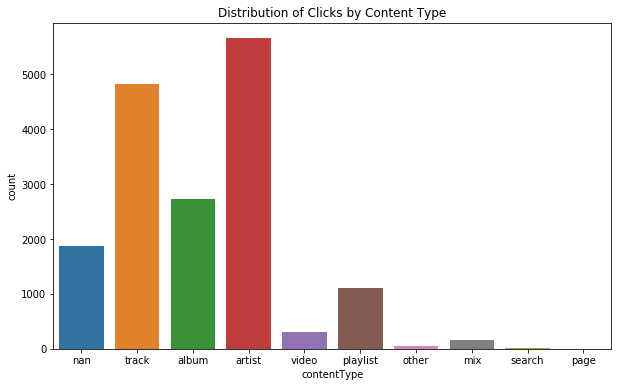

In [23]:
#coercing the column's value type to str to avoid error in plotting 
click_search.contentType = click_search.contentType.astype(str)

plt.figure(figsize=(10, 6)) 
sns.countplot(click_search.contentType).set(title='Distribution of Clicks by Content Type');

Artist are clicked the most, followed by individual tracks. videos, mixes, searches, and pages are rarely clicked.

I want to investigate the NaN rows values more closely:

In [35]:
#getting the value counts of pageId in rows where contentType is null(string)
click_search[click_search['contentType'] == 'nan'].pageId.value_counts(dropna=False)

search         1288
search_serp     433
NaN             151
Name: pageId, dtype: int64

In [40]:
click_search[click_search['contentType'] == 'nan'].endResult.value_counts(dropna=False)

cancelSearch    957
navigation      915
Name: endResult, dtype: int64

In [61]:
#getting the value counts of contentId in rows where contentType is null(string)

click_search[click_search['contentType'] == 'nan'].contentId.value_counts(dropna=False).to_frame()

,contentId
NaN,1813
the black,19
erich kunzel happy,17
the artic,8
barry lyndon,2
magenta magenta,2
wolfgang leibnitz,2
dont stop me now,2
happy trails,2
bittersweet symphony,2


(!) So these are all problems here... the contentId's, for rows where the 'contentType' is 'nan', is supposed to just be a numerical id for the content, not any string of query or file path. 

In [52]:
for column in click_search.columns:
    print("---- %s ---" % column)
    print(click_search[column].value_counts(dropna=False), '\n')

---- dt ---
2021-02-06    2700
2021-02-01    2596
2021-02-05    2572
2021-02-07    2507
2021-02-04    2331
2021-02-03    2179
2021-02-02    1832
Name: dt, dtype: int64 

---- client_platform ---
desktop    6775
iOS        5292
android    4650
Name: client_platform, dtype: int64 

---- event_name ---
click_search    16717
Name: event_name, dtype: int64 

---- user_id ---
718     301
533     256
640     243
1069    222
967     210
       ... 
1178      1
99        1
38        1
1194      1
16        1
Name: user_id, Length: 1171, dtype: int64 

---- event_ts ---
1612411254406    9
1612252268076    8
1612518893238    6
1612166971287    5
1612710677060    4
                ..
1612317336430    1
1612634794863    1
1612629351273    1
1612722504554    1
1612377577659    1
Name: event_ts, Length: 15626, dtype: int64 

---- server_ts ---
1612340226    40
1612573693    29
1612655306    26
1612218194    25
1612145070    23
              ..
1612466017     1
1612574564     1
1612363631     1
161250

## ^ Avg. length of queries

In [62]:
search_query.head()

,dt,user_id,server_ts,query,queryUuid,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
0,2021-02-07,1094,1612718227,georg benda,8698c2dc-fd4e-4f2b-81e1-c79601cd5f7a,"[{""id"":""11363806"",""popularityWW"":""0""},{""id"":""1...","[{""id"":""12388224"",""popularityWW"":""0""},{""id"":""2...","[{""id"":""165946610"",""popularityCountry"":""2""},{""...",[],"{""track"":16,""video"":4,""artist"":18,""album"":10,""...","[{""id"":165946610,""contentType"":""Album""},{""id"":..."
1,2021-02-07,863,1612726941,in,98ffcc2e-f84e-4587-80fd-89e1b178225d,"[{""id"":""134858528"",""popularityCountry"":""97""},{...","[{""id"":""24053"",""popularityCountry"":""48""},{""id""...","[{""id"":""52885530"",""popularityCountry"":""90""},{""...","[{""id"":""37690657"",""popularityCountry"":""62""},{""...","{""track"":92,""video"":16,""artist"":74,""album"":39,...","[{""id"":134858528,""contentType"":""Track""},{""id"":..."
2,2021-02-07,850,1612715317,jid,83a827ae-a93e-4148-88a1-c9f2715b886a,"[{""id"":""108769424"",""popularityCountry"":""64""},{...","[{""id"":""7061089"",""popularityCountry"":""92""},{""i...","[{""id"":""100122410"",""popularityCountry"":""76""},{...","[{""id"":""120672680"",""popularityCountry"":""39""},{...","{""track"":9,""video"":6,""artist"":11,""album"":6,""pl...","[{""id"":7061089,""contentType"":""Artist""},{""id"":1..."
3,2021-02-07,49,1612725870,Benz window,2487a99a-efb9-41ee-8f8d-e4203ea22f4c,"[{""id"":""102847894"",""popularityWW"":""0""},{""id"":""...","[{""id"":""11408668"",""popularityWW"":""0""}]",[],[],"{""track"":35,""video"":4,""artist"":34,""album"":10,""...","[{""id"":46783326,""contentType"":""Playlist""},{""id..."
4,2021-02-07,231,1612726235,London homesick,a1ad34dd-0927-42cf-84f4-e9c6fafbfb86,"[{""id"":""35717236"",""popularityCountry"":""4""},{""i...",[],[],[],"{""track"":71,""video"":14,""artist"":32,""album"":33,...","[{""id"":7896962,""contentType"":""Playlist""},{""id""..."


In [63]:
search_query.isna().sum()

dt               0
user_id          0
server_ts        0
query            0
queryUuid        0
trackResults     0
artistResults    0
albumResults     0
videoResults     0
responseTime     0
topResults       0
dtype: int64

In [64]:
#total number of queries
num_queries = len(search_query['query'])

#length of value, for each value in 'query'
lengths = [len(i) for i in search_query['query']]

#avg
print('Average length of queries:', sum(lengths)/num_queries, 'characters')


Average length of queries: 7.20341726618705 characters


## *CTR (click-through rate) by client platform

**First impression = returned results**

**click = click_search** on content

In [66]:
search_query.head()

,dt,user_id,server_ts,query,queryUuid,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
0,2021-02-07,1094,1612718227,georg benda,8698c2dc-fd4e-4f2b-81e1-c79601cd5f7a,"[{""id"":""11363806"",""popularityWW"":""0""},{""id"":""1...","[{""id"":""12388224"",""popularityWW"":""0""},{""id"":""2...","[{""id"":""165946610"",""popularityCountry"":""2""},{""...",[],"{""track"":16,""video"":4,""artist"":18,""album"":10,""...","[{""id"":165946610,""contentType"":""Album""},{""id"":..."
1,2021-02-07,863,1612726941,in,98ffcc2e-f84e-4587-80fd-89e1b178225d,"[{""id"":""134858528"",""popularityCountry"":""97""},{...","[{""id"":""24053"",""popularityCountry"":""48""},{""id""...","[{""id"":""52885530"",""popularityCountry"":""90""},{""...","[{""id"":""37690657"",""popularityCountry"":""62""},{""...","{""track"":92,""video"":16,""artist"":74,""album"":39,...","[{""id"":134858528,""contentType"":""Track""},{""id"":..."
2,2021-02-07,850,1612715317,jid,83a827ae-a93e-4148-88a1-c9f2715b886a,"[{""id"":""108769424"",""popularityCountry"":""64""},{...","[{""id"":""7061089"",""popularityCountry"":""92""},{""i...","[{""id"":""100122410"",""popularityCountry"":""76""},{...","[{""id"":""120672680"",""popularityCountry"":""39""},{...","{""track"":9,""video"":6,""artist"":11,""album"":6,""pl...","[{""id"":7061089,""contentType"":""Artist""},{""id"":1..."
3,2021-02-07,49,1612725870,Benz window,2487a99a-efb9-41ee-8f8d-e4203ea22f4c,"[{""id"":""102847894"",""popularityWW"":""0""},{""id"":""...","[{""id"":""11408668"",""popularityWW"":""0""}]",[],[],"{""track"":35,""video"":4,""artist"":34,""album"":10,""...","[{""id"":46783326,""contentType"":""Playlist""},{""id..."
4,2021-02-07,231,1612726235,London homesick,a1ad34dd-0927-42cf-84f4-e9c6fafbfb86,"[{""id"":""35717236"",""popularityCountry"":""4""},{""i...",[],[],[],"{""track"":71,""video"":14,""artist"":32,""album"":33,...","[{""id"":7896962,""contentType"":""Playlist""},{""id""..."


In [67]:
search_result.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,query,searchUuid,queryUuid
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75


Re-clarifying for myself: search_result encapsulates what is actually showing in the result through the queryUuid. What is showing through each result event can be seen by joining those two dfs. However I'm only concerned with *if* a result is showing and not with *what* is showing.

In [68]:
click_search.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-02,android,click_search,951,1612233213601,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,NaN,search,cancelSearch,nan,NaN,NaN,NaN,xSearch
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN


More notes: 

As we can see in the first two rows for the click_search df, there are matching searchUuids, but only one queryUuid. The NaN for missing queryUuid would not be considered an impression as the endResult was just cancelSearch. In otherwords, if there is no queryUuid, there is no impression, no results seen. The amount of queryUuids is what we want.

There are matching queryUuids (with the same searchUuid) for two separate click events. In other words, the same impression has two clicks. 

In [69]:
#exploring a highly used queryUuid
search_result[search_result.queryUuid == '543c49d9-fb71-429c-9ad7-cfc173b285a2']

,dt,client_platform,event_name,user_id,event_ts,server_ts,query,searchUuid,queryUuid
2707,2021-02-01,desktop,search_result,455,1612199023367,1612199026,danny schiller,36dba697-9f8d-422e-a4a5-8a11c12de36b,543c49d9-fb71-429c-9ad7-cfc173b285a2
2708,2021-02-01,desktop,search_result,455,1612199023547,1612199026,danny schiller,b386350d-9b70-4ac7-b88c-27e489949a05,543c49d9-fb71-429c-9ad7-cfc173b285a2
14383,2021-02-02,desktop,search_result,455,1612224806731,1612224808,danny schiller,b0863dc8-a237-4274-a978-bd28e6a1cc9c,543c49d9-fb71-429c-9ad7-cfc173b285a2
14384,2021-02-02,desktop,search_result,455,1612224805365,1612224808,danny schiller,7d5f21a5-637e-405c-abef-3b01f98f1558,543c49d9-fb71-429c-9ad7-cfc173b285a2
17241,2021-02-02,desktop,search_result,455,1612224806562,1612224808,danny schiller,8091a623-8c61-417d-a34a-9080811f56bf,543c49d9-fb71-429c-9ad7-cfc173b285a2
17242,2021-02-02,desktop,search_result,455,1612224806901,1612224808,danny schiller,f7c2879d-e0b5-4247-85d5-901e55e811cd,543c49d9-fb71-429c-9ad7-cfc173b285a2
17243,2021-02-02,desktop,search_result,455,1612224805208,1612224808,danny schiller,a1ec1db0-79d3-4dab-b9bd-7d9dda3a9a26,543c49d9-fb71-429c-9ad7-cfc173b285a2
17244,2021-02-02,desktop,search_result,455,1612224807487,1612224808,s,abb29267-1ce0-4561-957e-1e87f0d83c78,543c49d9-fb71-429c-9ad7-cfc173b285a2
17245,2021-02-02,desktop,search_result,455,1612224805583,1612224808,danny schiller,66731157-c060-4db9-9134-efdf42ca77e7,543c49d9-fb71-429c-9ad7-cfc173b285a2


In [70]:
#left joining search_result with clicks. left join for total impressions
impr_n_clicks = pd.merge(search_result, click_search, on='searchUuid', how='left')
impr_n_clicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53514 entries, 0 to 53513
Data columns (total 23 columns):
dt_x                 53514 non-null object
client_platform_x    53514 non-null object
event_name_x         53514 non-null object
user_id_x            53514 non-null int64
event_ts_x           53514 non-null int64
server_ts_x          53514 non-null int64
query                53486 non-null object
searchUuid           53514 non-null object
queryUuid_x          53486 non-null object
dt_y                 47201 non-null object
client_platform_y    47201 non-null object
event_name_y         47201 non-null object
user_id_y            47201 non-null float64
event_ts_y           47201 non-null float64
server_ts_y          47201 non-null float64
queryUuid_y          45467 non-null object
pageId               45290 non-null object
endResult            47201 non-null object
contentType          47201 non-null object
contentId            40091 non-null object
contentPlacement     38225 non-

We can see there are more rows returned than are present in search_result again, which means that there are numerous matching rows in click_search (ie. the same query being typed out as we saw earlier). But if there are queryUuids, all of those count as impressions.

In [71]:
impr_n_clicks.head()

,dt_x,client_platform_x,event_name_x,user_id_x,event_ts_x,server_ts_x,query,searchUuid,queryUuid_x,dt_y,client_platform_y,event_name_y,user_id_y,event_ts_y,server_ts_y,queryUuid_y,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
0,2021-02-06,iOS,search_result,250,1612639179188,1612639179,The,1612639176586.041507019172635133,2574e1b5-023f-49e7-bfca-94bc1630fa57,2021-02-06,iOS,click_search,250.0,1.612639e+12,1.612639e+09,4672df43-4770-4e2c-8edc-a81b56c3349e,search,playback,track,77750066,NaN,NaN,NaN
1,2021-02-06,iOS,search_result,987,1612643266165,1612643266,S,1612643264805.0175305242380418880,4c9dea6e-069f-4f56-8f98-9a354d498f46,2021-02-06,iOS,click_search,987.0,1.612643e+12,1.612643e+09,aeea9cac-4e09-4023-9714-5fa77aed762a,search,navigation,artist,4942474,0.0,search_topresult,NaN
2,2021-02-06,iOS,search_result,266,1612649431495,1612649431,Full of smoke,1612649421092.042425692113708085,c27b2912-b7ba-4642-b663-83ebba4bca7d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-06,android,search_result,773,1612644037697,1612644069,microphones in,0b61e3c2-091e-4273-b15a-e3e80326a81d,015c5ac7-1d33-4788-95eb-bed1cd1dd422,2021-02-06,android,click_search,773.0,1.612644e+12,1.612644e+09,4cb2ab96-7db1-4c08-b34b-1d65d2437cfb,search,playback,track,88969888,0.0,search_topresult,NaN
4,2021-02-06,android,search_result,773,1612644463249,1612644488,blue fla,72433904-257a-4899-ad11-cafca503381a,a8032920-6fe6-4e34-8b7d-860ab9cbeb75,2021-02-06,android,click_search,773.0,1.612644e+12,1.612644e+09,NaN,search,cancelSearch,nan,NaN,NaN,NaN,xSearch


In [72]:
impr_n_clicks.event_name_y.value_counts(dropna=False)

click_search    47201
NaN              6313
Name: event_name_y, dtype: int64

In [73]:
#count of impressions of any search results per platform
impressions = impr_n_clicks.groupby("client_platform_x")['event_name_x'].count()
impressions

client_platform_x
android    18630
desktop     4510
iOS        30374
Name: event_name_x, dtype: int64

In [74]:
#count of events/rows that are only click_search per platform
clicks = impr_n_clicks[impr_n_clicks['event_name_y'] == 'click_search'].groupby("client_platform_y")['event_name_y'].count()
clicks

client_platform_y
android    17255
desktop     3786
iOS        26160
Name: event_name_y, dtype: int64

In [78]:
#creating new df, using the objects I created as rows and calculating CTR.
df = impressions.to_frame(name='impressions')
df['clicks'] = clicks
df['CTR'] = (clicks/impressions) * 100
df

,impressions,clicks,CTR
client_platform_x,,,
android,18630,17255,92.619431
desktop,4510,3786,83.946785
iOS,30374,26160,86.126292


# ^Number of search clicks on topResults
As click events are simply just the rows of click_search, I want the number of events/clicks that are topresult.

In [79]:
click_search.moduleId.value_counts()

search_topresult       10625
search_album            1509
search_playlist          586
search_null              584
search_tracks            384
search_artists           227
search_albums            210
search_artist            195
search_mix               152
search_playlists         130
search_track             125
search_recentsearch       82
search_video              73
search_videos             32
Name: moduleId, dtype: int64

Curious as the what the counts are for contentPlacement clicks of the topresults.

In [80]:
click_search[click_search['moduleId'] == 'search_topresult'].contentPlacement.value_counts()

 0.0     4705
 1.0     3078
 2.0     1127
 3.0      627
 4.0      414
 5.0      227
 6.0      134
 7.0      104
 8.0       51
 9.0       38
 10.0      34
 11.0      25
 12.0      20
 13.0      14
-1.0        5
 14.0       5
Name: contentPlacement, dtype: int64

As expected the most relevant results, the top ones, have more clicks. 

Also slight error here, -1.0 should be 1.0 I'm guessing!

# ^Average/Median time to click per search session

As there are numerous events for each sesssion, I want to start the time at the first event, and associate the click to the last event time.

In [81]:
initiate_search.head()

,dt,client_platform,event_name,user_id,event_ts,server_ts,method,searchUuid
0,2021-02-06,iOS,initiate_search,225,1612648404589,1612648405,clickInBar,1612648404588.040518700386519682
1,2021-02-05,iOS,initiate_search,95,1612565307151,1612565307,deleteSearch,1612565307150.03093909192593003
2,2021-02-05,iOS,initiate_search,95,1612564857792,1612564858,deleteSearch,1612564857791.03093909192593003
3,2021-02-05,iOS,initiate_search,95,1612565891804,1612565892,deleteSearch,1612565891803.03093909192593003
4,2021-02-05,iOS,initiate_search,95,1612564856980,1612564857,searchButton,1612564856977.03093909192593003


Could look at time to search from final searchbutton, which would discount typos and things like that from defining the start of the search session (user's fault). 

content type can't be NaN, end of session is click on content, not a click ending in cancelSearch

In [82]:
#click_df should not contain any cancelSearch as they are not content (signifying the end of the search)
end_of_session = click_search[click_search['endResult'] != 'cancelSearch']
end_of_session

,dt,client_platform,event_name,user_id,event_ts,server_ts,searchUuid,queryUuid,pageId,endResult,contentType,contentId,contentPlacement,moduleId,buttonId
1,2021-02-02,android,click_search,951,1612233225774,1612233291,bb45102e-0efe-45e3-8298-c74728c0dcb4,5fa761dd-f937-4431-903d-cc2d31b8b5bd,search,playback,track,109582305,1.0,search_topresult,NaN
2,2021-02-02,iOS,click_search,1128,1612233621630,1612233621,1612233604129.0176685845395195847,f6355ee9-e522-4a12-8839-3bba00e561fb,search,playback,track,70170184,1.0,search_topresult,NaN
3,2021-02-02,iOS,click_search,177,1612233483273,1612233483,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,album,160351543,4.0,search_topresult,NaN
4,2021-02-02,iOS,click_search,177,1612232890509,1612232891,1612232865985.036730574371815387,49a5b5d3-1cec-48cd-8686-b1abe942e66e,search,navigation,artist,4332277,0.0,search_topresult,NaN
5,2021-02-02,desktop,click_search,52,1612231661540,1612231602,4404dfd9-3ffb-4071-ad25-20d8368f9e0a,12761cd1-d609-46c2-8bf7-fb480d7d8b52,search_serp,navigation,album,5118181,4.0,search_topresult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,2021-02-01,desktop,click_search,631,1612144721053,1612144723,ad816ed9-f087-442d-aead-a0bf112c42b4,c3a3fc03-5f68-4363-a230-ee2993f98be4,NaN,navigation,artist,4385513,1.0,search_topresult,NaN
16713,2021-02-01,desktop,click_search,631,1612144660658,1612144663,57f930f1-2750-402c-845a-90caa00f1237,f3724b0e-c9bf-4fc3-95b8-14fbf6bb0f2b,NaN,navigation,nan,erich kunzel happy,0.0,search_null,NaN
16714,2021-02-01,desktop,click_search,631,1612144658046,1612144660,c2f44964-fadf-45c8-99d6-b7966384df49,013d59a6-bed5-42f6-944b-38adb26f1266,search_serp,navigation,album,77613336,1.0,search_album,NaN
16715,2021-02-04,android,click_search,438,1612403013040,1612411634,a51fbd64-337c-45fa-8bc0-d00f74ca4389,f38040d8-b958-404e-9a20-6a8dac3e710a,search,navigation,artist,3652822,0.0,search_topresult,NaN


Some sessions have click endings but then more clicking... but we are just looking at time to first click on content.

In [83]:
#inner join for just iniate_search rows with clicks
init_to_click = pd.merge(initiate_search, end_of_session, on='searchUuid', how='inner')

#get first/minimum event_ts_x in search_group, add to init_to_click df
search_group = init_to_click.groupby('searchUuid')['event_ts_x']
init_to_click['session_start_time' ] = search_group.transform('min')

#df of just search initiations (mins)
first_searches = init_to_click[init_to_click['event_ts_x'] == init_to_click['session_start_time']]

#subtracting last event timestamp from first timestamp
first_searches['time_to_click'] = first_searches['event_ts_y'] - first_searches['session_start_time']

#this showed me there are clicks at the same initiate_search time, perhaps events trigged by clicking results 
#already present on the search page? This only happens on desktop. maybe app doesn't have content on the search page?
# first_searches[first_searches['time_to_click'] == 0]

#this showed me there are 2 negative times, errors?
first_searches = first_searches[first_searches['time_to_click'] > 0]


print("Median time to click per search session:", first_searches['time_to_click'].median() / 1000, 'seconds')

Median time to click per search session: 8.7105 seconds


thoughts on this event trigged and ended at 0... having such good recommendations on the front page is convenient for users. but does tidal want this? 
less time to click or spending more time on the app?

# ^Number of search sessions with a query that had zero search results

Sound like I should count the NaN rows in an outer-joined (search_query + search_result) df

actually, search results that resulted in no query ran- a little backwards.

In [84]:
#outer join for all results + any backend querying
all_queries_and_results = pd.merge(search_result, search_query, on='queryUuid', how='outer')

#filtering out some empty searches
all_queries_and_results = all_queries_and_results[all_queries_and_results['query_x'].notnull()]

#df of all querys with null/no results
query_zero_results = all_queries_and_results[all_queries_and_results['query_y'].isna()]
display(query_zero_results.head())
print('Number of search sessions with a query that had zero search results:', len(query_zero_results))


,dt_x,client_platform,event_name,user_id_x,event_ts,server_ts_x,query_x,searchUuid,queryUuid,dt_y,user_id_y,server_ts_y,query_y,trackResults,artistResults,albumResults,videoResults,responseTime,topResults
204,2021-02-06,android,search_result,44,1611970726034,1612635533,c,87b3b59f-542f-4967-8d61-9516574cbc97,a52ad892-8b3b-40ef-ab52-7d5a3ac9ecac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2021-02-06,android,search_result,44,1611970727718,1612635533,cupi,87b3b59f-542f-4967-8d61-9516574cbc97,4e6e017a-38a9-486d-8d2b-7338e56340f3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,2021-02-06,android,search_result,44,1611970729194,1612635533,cupid,87b3b59f-542f-4967-8d61-9516574cbc97,5946d63c-acad-45d6-a500-3a779337204e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,2021-02-06,android,search_result,44,1611970728468,1612635533,cupid,87b3b59f-542f-4967-8d61-9516574cbc97,b8ab71cf-eb89-44c0-ae1f-90cee4d85a92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,2021-02-05,android,search_result,1066,1611438192636,1612569263,21,5bf1292a-085e-49cc-bc1f-46afe7b745df,505d23ba-437e-4c0c-a502-fcbdc6f14982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of search sessions with a query that had zero search results: 1231


## A look at user_metadata

In [88]:
user_metadata

,user_id,birthday,gender,countryCode,free,churned,subscriptionType
0,730,1993-04-29,NaN,US,False,False,PREMIUM_PLUS
1,338,NaN,NaN,DE,False,False,PREMIUM
2,435,NaN,NaN,DE,False,False,PREMIUM_PLUS
3,829,1998-12-30,f,US,False,False,PREMIUM
4,1075,NaN,m,DE,False,False,PREMIUM_PLUS
...,...,...,...,...,...,...,...
1195,992,NaN,NaN,US,False,False,PREMIUM_PLUS
1196,120,1998-11-16,m,CA,False,False,PREMIUM
1197,255,NaN,NaN,DK,False,False,PREMIUM
1198,1107,1959-06-04,NaN,NL,False,False,PREMIUM_PLUS


I'm definitely interested in churned users! Why?!

In [87]:
user_metadata.churned.value_counts()

False    1157
True       43
Name: churned, dtype: int64

In [90]:
user_metadata[user_metadata.churned == True]

,user_id,birthday,gender,countryCode,free,churned,subscriptionType
29,650,1973-03-02,NaN,IT,False,True,INTRO
49,121,NaN,m,PL,False,True,INTRO
121,1163,2001-05-14,NaN,US,False,True,INTRO
127,642,1972-12-10,NaN,US,False,True,INTRO
142,828,NaN,NaN,US,False,True,INTRO
171,899,NaN,NaN,US,False,True,INTRO
223,1160,NaN,NaN,US,False,True,INTRO
260,932,1997-05-24,NaN,DE,False,True,INTRO
272,1171,1998-12-21,NaN,RO,False,True,INTRO
308,592,1942-09-25,m,SE,False,True,INTRO


I'm a little confused as to these churned intro accounts, shouldn't they all be free = True for the intro trial?